170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/5
1563/1563 [==============================] - 423s 269ms/step - loss: 1.5944 - accuracy: 0.4106 - val_loss: 1.2954 - val_accuracy: 0.5387
Epoch 2/5
1563/1563 [==============================] - 407s 261ms/step - loss: 1.1917 - accuracy: 0.5741 - val_loss: 1.0618 - val_accuracy: 0.6192
Epoch 3/5
1563/1563 [==============================] - 404s 258ms/step - loss: 1.0213 - accuracy: 0.6389 - val_loss: 0.8874 - val_accuracy: 0.6857
Epoch 4/5
1563/1563 [==============================] - 398s 254ms/step - loss: 0.9250 - accuracy: 0.6748 - val_loss: 0.8362 - val_accuracy: 0.7114
Epoch 5/5
1563/1563 [==============================] - 403s 258ms/step - loss: 0.8629 - accuracy: 0.6990 - val_loss: 0.7833 - val_accuracy: 0.7259


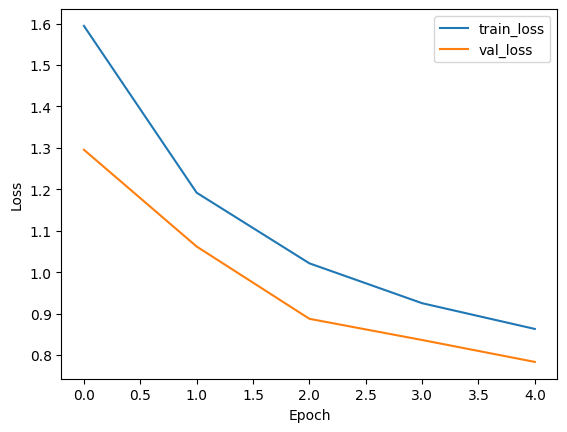

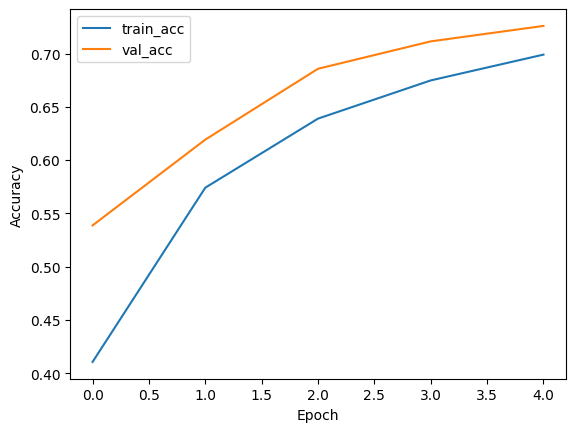

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

# Convert labels to one-hot encoded vectors
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Scale the pixel values
train_data = train_data / 255.0
test_data = test_data / 255.0

# Define the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save the history object
history = model.fit(train_data, train_labels, epochs=5, batch_size=32, validation_data=(test_data, test_labels))

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy curves
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()